# Titulo: Matrices de pesos espaciales.
## Diplomado: Geoestadística y análisis espacial
## SciData
## Instructor: Alexis Adonai Morales Alberto


In [1]:
# Carga de modulos

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from libpysal.weights import Queen
from libpysal.weights import Rook
from shapely.geometry import LineString

In [2]:
import libpysal
libpysal.__version__

'4.13.0'

In [3]:
# Configuración de google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Ruta completa del archivo

ruta = '/content/drive/MyDrive/SciData/GEOAES_25/Mapas/México_ent_22/00ent'

In [12]:
# Cargar mapa

Mapa = gpd.read_file(ruta + '.shp')
Mapa

Output hidden; open in https://colab.research.google.com to view.

## Matriz de pesos - Método de contigüidad : Reina

In [30]:
# Cálculo de matriz

W = Queen.from_dataframe(Mapa, ids = "CVE_ENT")

# Normalizar filas

W.transform = 'r'

In [31]:
W.neighbors

{'01': ['32', '14'],
 '02': ['26', '03'],
 '03': ['02'],
 '04': ['23', '27', '31'],
 '05': ['10', '32', '08', '19'],
 '06': ['14', '16'],
 '07': ['20', '27', '30'],
 '08': ['25', '10', '26', '05'],
 '09': ['17', '15'],
 '10': ['18', '25', '32', '08', '05'],
 '11': ['14', '22', '24', '32', '16'],
 '12': ['20', '15', '17', '21', '16'],
 '13': ['22', '30', '15', '24', '21', '29'],
 '14': ['06', '18', '11', '32', '16', '01'],
 '15': ['17', '09', '13', '21', '29', '12', '22', '16'],
 '16': ['06', '12', '14', '11', '22', '15'],
 '17': ['12', '21', '15', '09'],
 '18': ['25', '10', '32', '14'],
 '19': ['24', '32', '05', '28'],
 '20': ['12', '21', '07', '30'],
 '21': ['12', '15', '30', '17', '20', '13', '29'],
 '22': ['11', '15', '24', '13', '16'],
 '23': ['04', '31'],
 '24': ['11', '22', '30', '28', '32', '13', '19'],
 '25': ['18', '10', '08', '26'],
 '26': ['25', '08', '02'],
 '27': ['04', '07', '30'],
 '28': ['24', '30', '19'],
 '29': ['21', '13', '15'],
 '30': ['20', '28', '27', '24', '21',

In [10]:
# Visualizar contiguidad entre vecinos

## Vecinos de aguascalientes (CVE_ENT = 1)

print("Vecinos de la unidad 1 (0):")
print(W.neighbors['01'])

Vecinos de la unidad 1 (0):
['32', '14']


In [18]:
print("Vecinos de la unidad:")
print(W.neighbors['13'])

Vecinos de la unidad:
['22', '30', '15', '24', '21', '29']


In [17]:
# Visualizar pesos entre vecinos

## Vecinos de aguascalientes (CVE_ENT = 1)

print("Vecinos de la unidad 1:")
print(W.weights['01'])

Vecinos de la unidad 1:
[0.5, 0.5]


In [15]:
print("Vecinos de la unidad:")
print(W.weights['13'])

Vecinos de la unidad:
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [19]:
# Matriz completa

W_dense, ids = W.full()

print("Dimensión de W:", W_dense.shape)
W_dense

Dimensión de W: (32, 32)


array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.5  ],
       [0.   , 0.   , 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.125, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [20]:
W_sparse = W.sparse

print(W_sparse)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 134 stored elements and shape (32, 32)>
  Coords	Values
  (0, 13)	0.5
  (0, 31)	0.5
  (1, 2)	0.5
  (1, 25)	0.5
  (2, 1)	1.0
  (3, 22)	0.3333333333333333
  (3, 26)	0.3333333333333333
  (3, 30)	0.3333333333333333
  (4, 7)	0.25
  (4, 9)	0.25
  (4, 18)	0.25
  (4, 31)	0.25
  (5, 13)	0.5
  (5, 15)	0.5
  (6, 19)	0.3333333333333333
  (6, 26)	0.3333333333333333
  (6, 29)	0.3333333333333333
  (7, 4)	0.25
  (7, 9)	0.25
  (7, 24)	0.25
  (7, 25)	0.25
  (8, 14)	0.5
  (8, 16)	0.5
  (9, 4)	0.2
  (9, 7)	0.2
  :	:
  (26, 6)	0.3333333333333333
  (26, 29)	0.3333333333333333
  (27, 18)	0.3333333333333333
  (27, 23)	0.3333333333333333
  (27, 29)	0.3333333333333333
  (28, 12)	0.3333333333333333
  (28, 14)	0.3333333333333333
  (28, 20)	0.3333333333333333
  (29, 6)	0.14285714285714285
  (29, 12)	0.14285714285714285
  (29, 19)	0.14285714285714285
  (29, 20)	0.14285714285714285
  (29, 23)	0.14285714285714285
  (29, 26)	0.14285714285714285
  (29, 27)	0

In [21]:
# Diagnóstico rápido

print("Número de observaciones:", W.n)
print("Islas (sin vecinos):", W.islands)
print("Componentes conectados:", W.n_components)

Número de observaciones: 32
Islas (sin vecinos): []
Componentes conectados: 1


/tmp/ipython-input-3875022048.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W_queen = Queen.from_dataframe(Mapa)


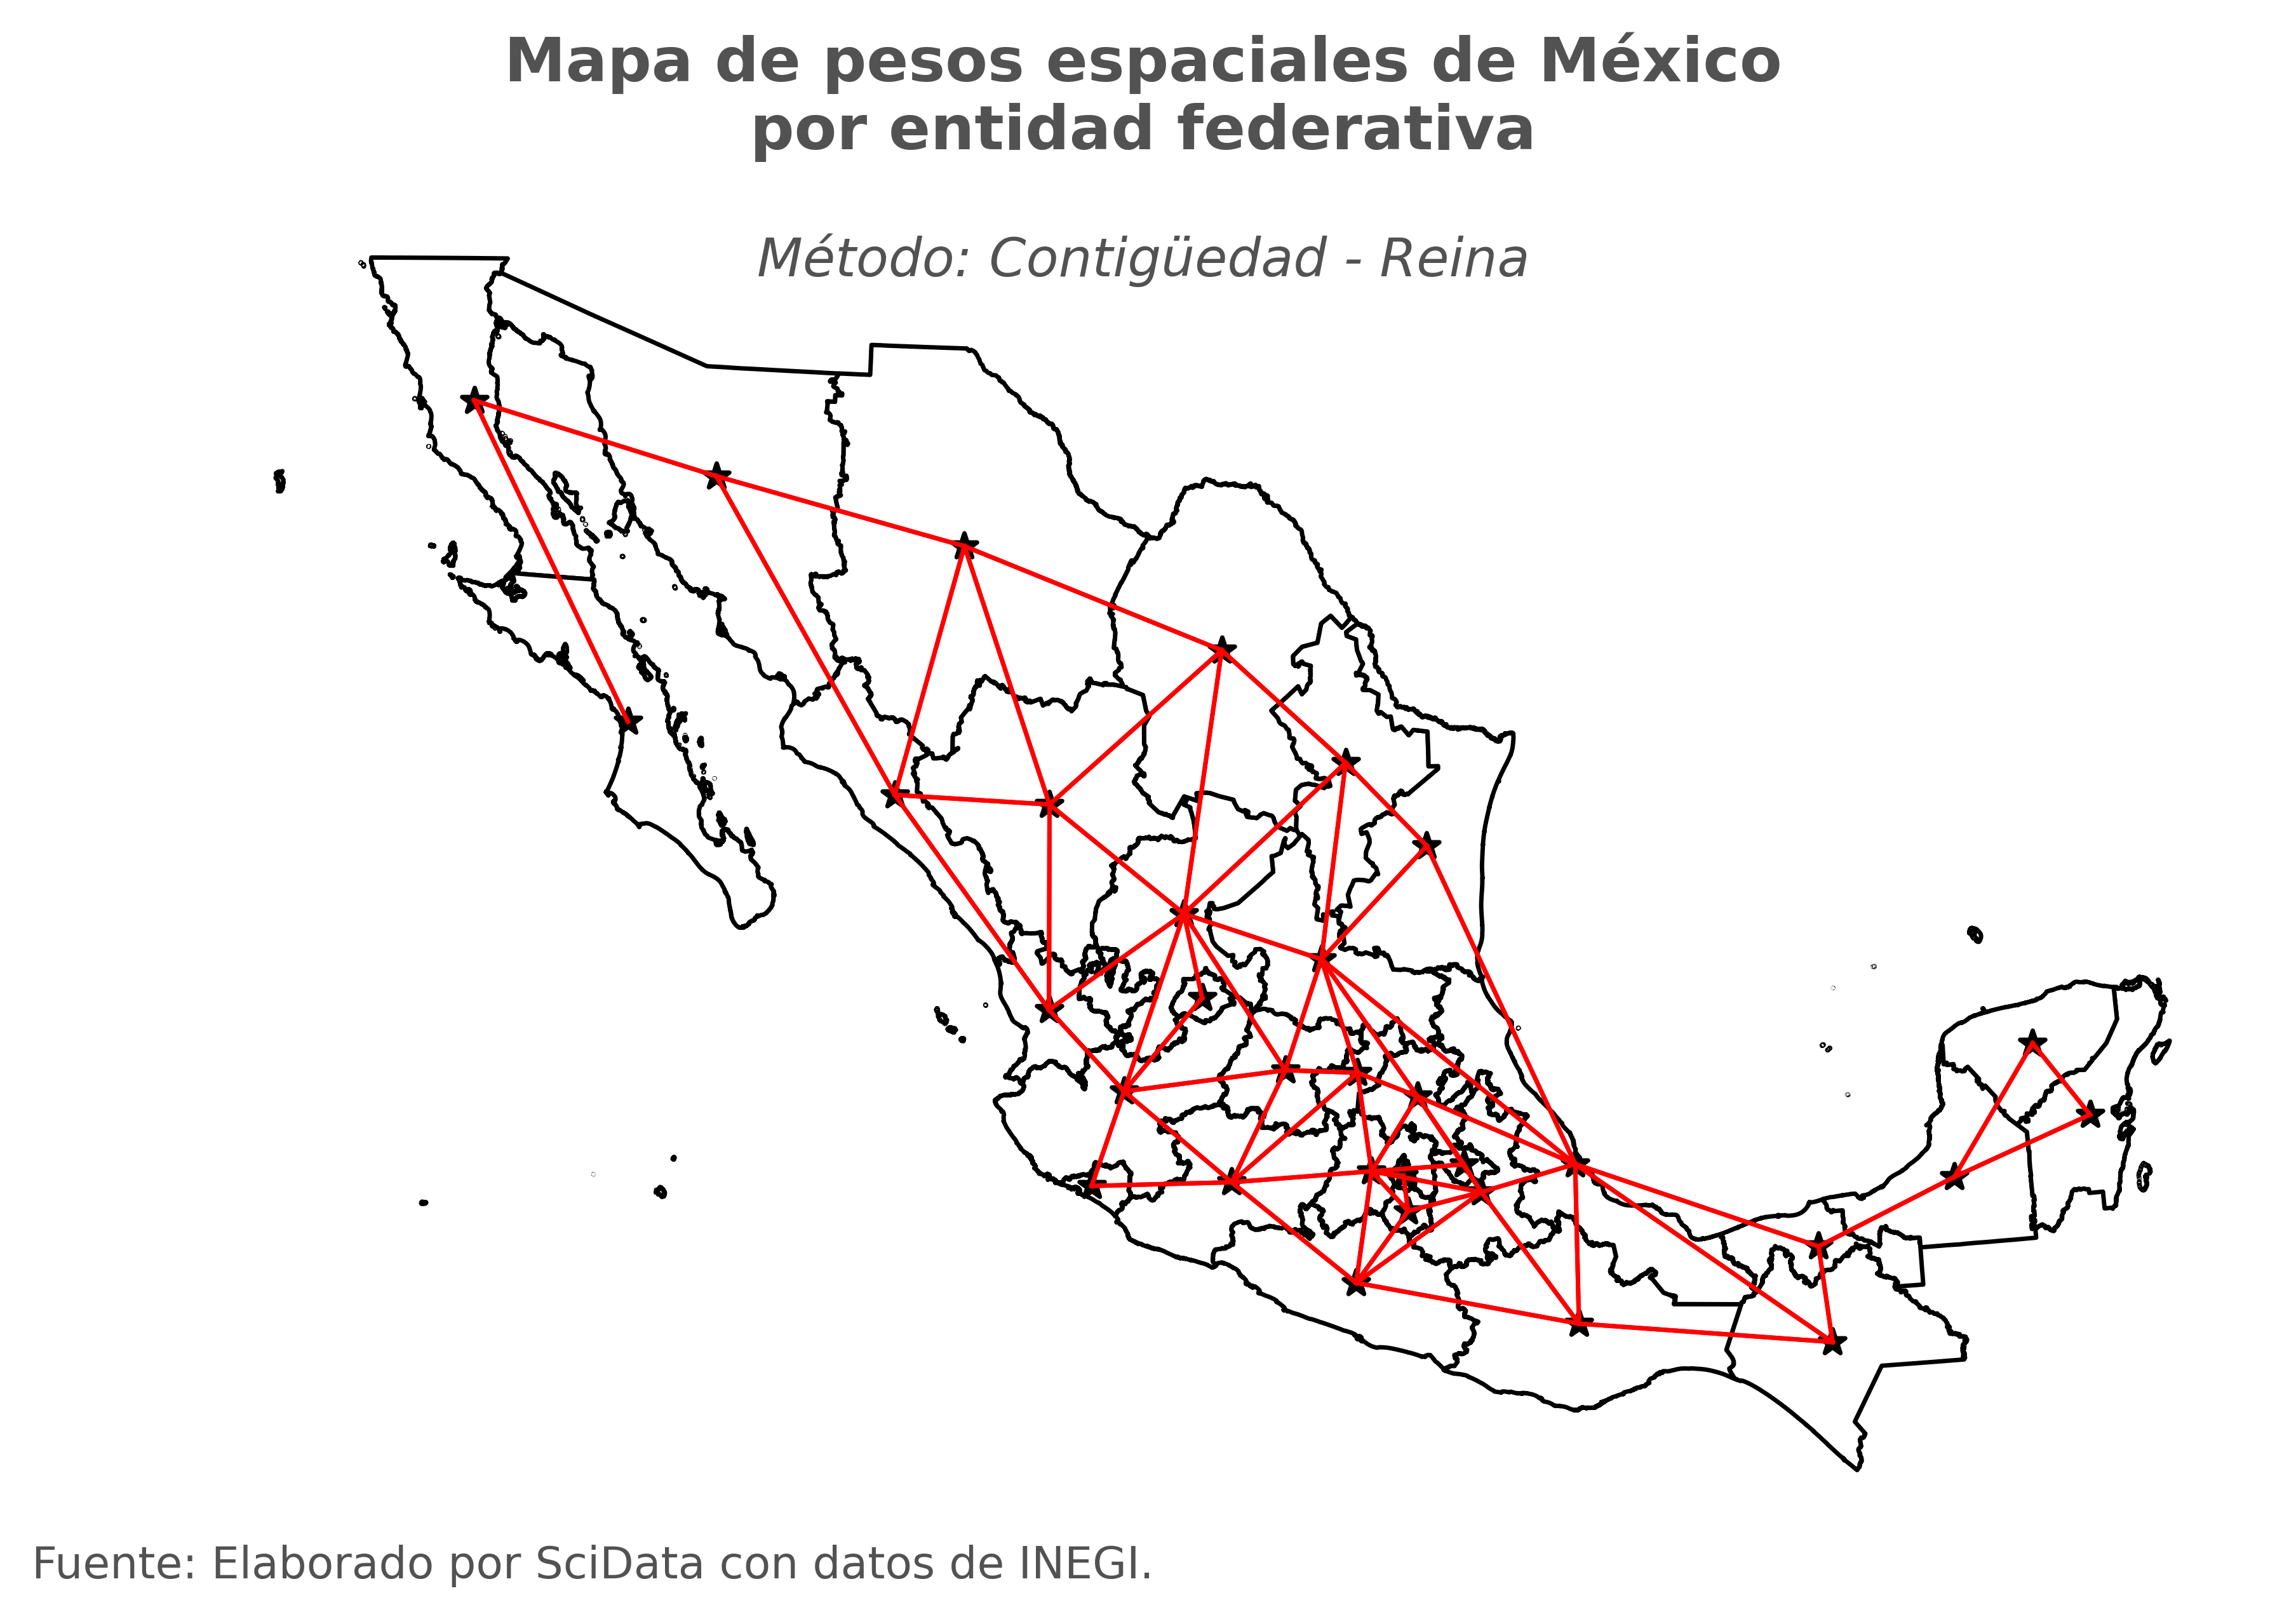

In [27]:
# Re calcular la matriz sin ids

W_queen = Queen.from_dataframe(Mapa)

# Normalizar filas

W_queen.transform = 'r'

## Visualización del mapa

fig, ax = plt.subplots(1,1, figsize = (10,5), dpi = 500)
#Poligonos
Mapa.plot(ax = ax,
          color = "white",
          edgecolor="black")
#Conexiones reina
W_queen.plot(
    Mapa,
    edge_kws = dict(linewidth = 1, color = "red"),
    node_kws = dict(marker = "*"),
    ax = ax
)
plt.figtext(0.4, 0.95, "Mapa de pesos espaciales de México\npor entidad federativa",
            fontweight = 'bold',
            color = "#525252",
            ha = 'center',
            fontsize = 14) # Titulo
plt.figtext(0.4, 0.87, "Método: Contigüedad - Reina",
            style = "italic",
            color = "#525252",
            ha = 'center',
            fontsize = 12) # Subtitulo
plt.figtext(0.05, 0.05, "Fuente: Elaborado por SciData con datos de INEGI.",
            color = "#525252",
            fontsize = 10) # Pie de gráfico
ax.set_axis_off()
ax = plt.gca()
plt.grid(False)
plt.tight_layout(rect = [0,0.05,0.85,0.95])
ruta_guardado = '/content/drive/MyDrive/SciData/GEOAES_25/Salidas/Vecinos_Queen.png'
plt.savefig(ruta_guardado, dpi = 500, bbox_inches = 'tight', facecolor = 'white')
